**TODO**
* Frequency of words used by a character over time (dwords / dmovie).
* Compare male older characters with female older characters --> Is Hagrid more of a mother figure or a father figure to Harry?

In [92]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt


In [93]:
def get_lines_from_file(char_name, book):   
    lines = []
    with open('csvs/hp' + book + char_name + '.csv') as f:
        for line in f:
            lines.append(line.rstrip())

    print char_name, 'number of lines:', len(lines)
    return lines

In [94]:
def load_entropies(entropies_file='ukwac.entropy.txt'):
    entropies_dict = {}
    with open(entropies_file, "r") as entropies:
        for line in entropies:
            word, score = line.split('\t')
            word = word.lower()
            # Must have this cos lower() can match two instances of the same word in the list
            if word.isalpha() and word not in entropies_dict:
                entropies_dict[word] = float(score)
    return entropies_dict

In [102]:

def get_freqdist(lines):
    ignore_list = [".", ",", "", "...", "i", "--", "!", "'s", "?","(", ")", "a", "about", "an", "and", "are", "around", "as", "at", "away", "be", "become", "became",
                 "been", "being", "by", "did", "do", "does", "during", "each", "for", "from", "get", "have", "has", "had",
                 "he", "her", "his", "how", "i", "if", "in", "is", "it", "its", "made", "make", "many", "most", "not", "of",
                 "on", "or", "s", "she", "some", "that", "the", "their", "there", "this", "these", "those", "to", "under",
    "was", "were", "what", "when", "where", "which", "who", "will", "with", "you", "your"]

    fdist = FreqDist()
    entropy_dict = load_entropies()
    for line in lines:
        for word in word_tokenize(line):
            try:
                if word.lower() not in ignore_list and entropy_dict[word.lower()]<15:
                    fdist[word.lower()] += 1
            except:
                pass

    #fdist = FreqDist(word.lower() for word in word_tokenize(sent))
    
    return fdist

In [103]:
def plot_freq(fdist):
    most_freq = fdist.most_common
    fdist.plot(title="Word distribution")
    plt.figure(figsize=(60,30))
    most_freq

harry number of lines: 503
['I,"can\'t,",Hedwig.,I\'m,not,allowed', 'to,use,magic,outside,of,school.', '"Besides,",if,Uncle,Vernon,--', "Now,you've,done,it.", "She's,bored.,If,I,could,just,let"]
<bound method FreqDist.most_common of FreqDist({'ron': 13, 'hagrid': 12, 'chamber': 10, 'hermione': 8, 'dobby': 7, 'secrets': 7, 'professor': 7, 'kill': 6, 'ginny': 6, 'monster': 6, ...})>


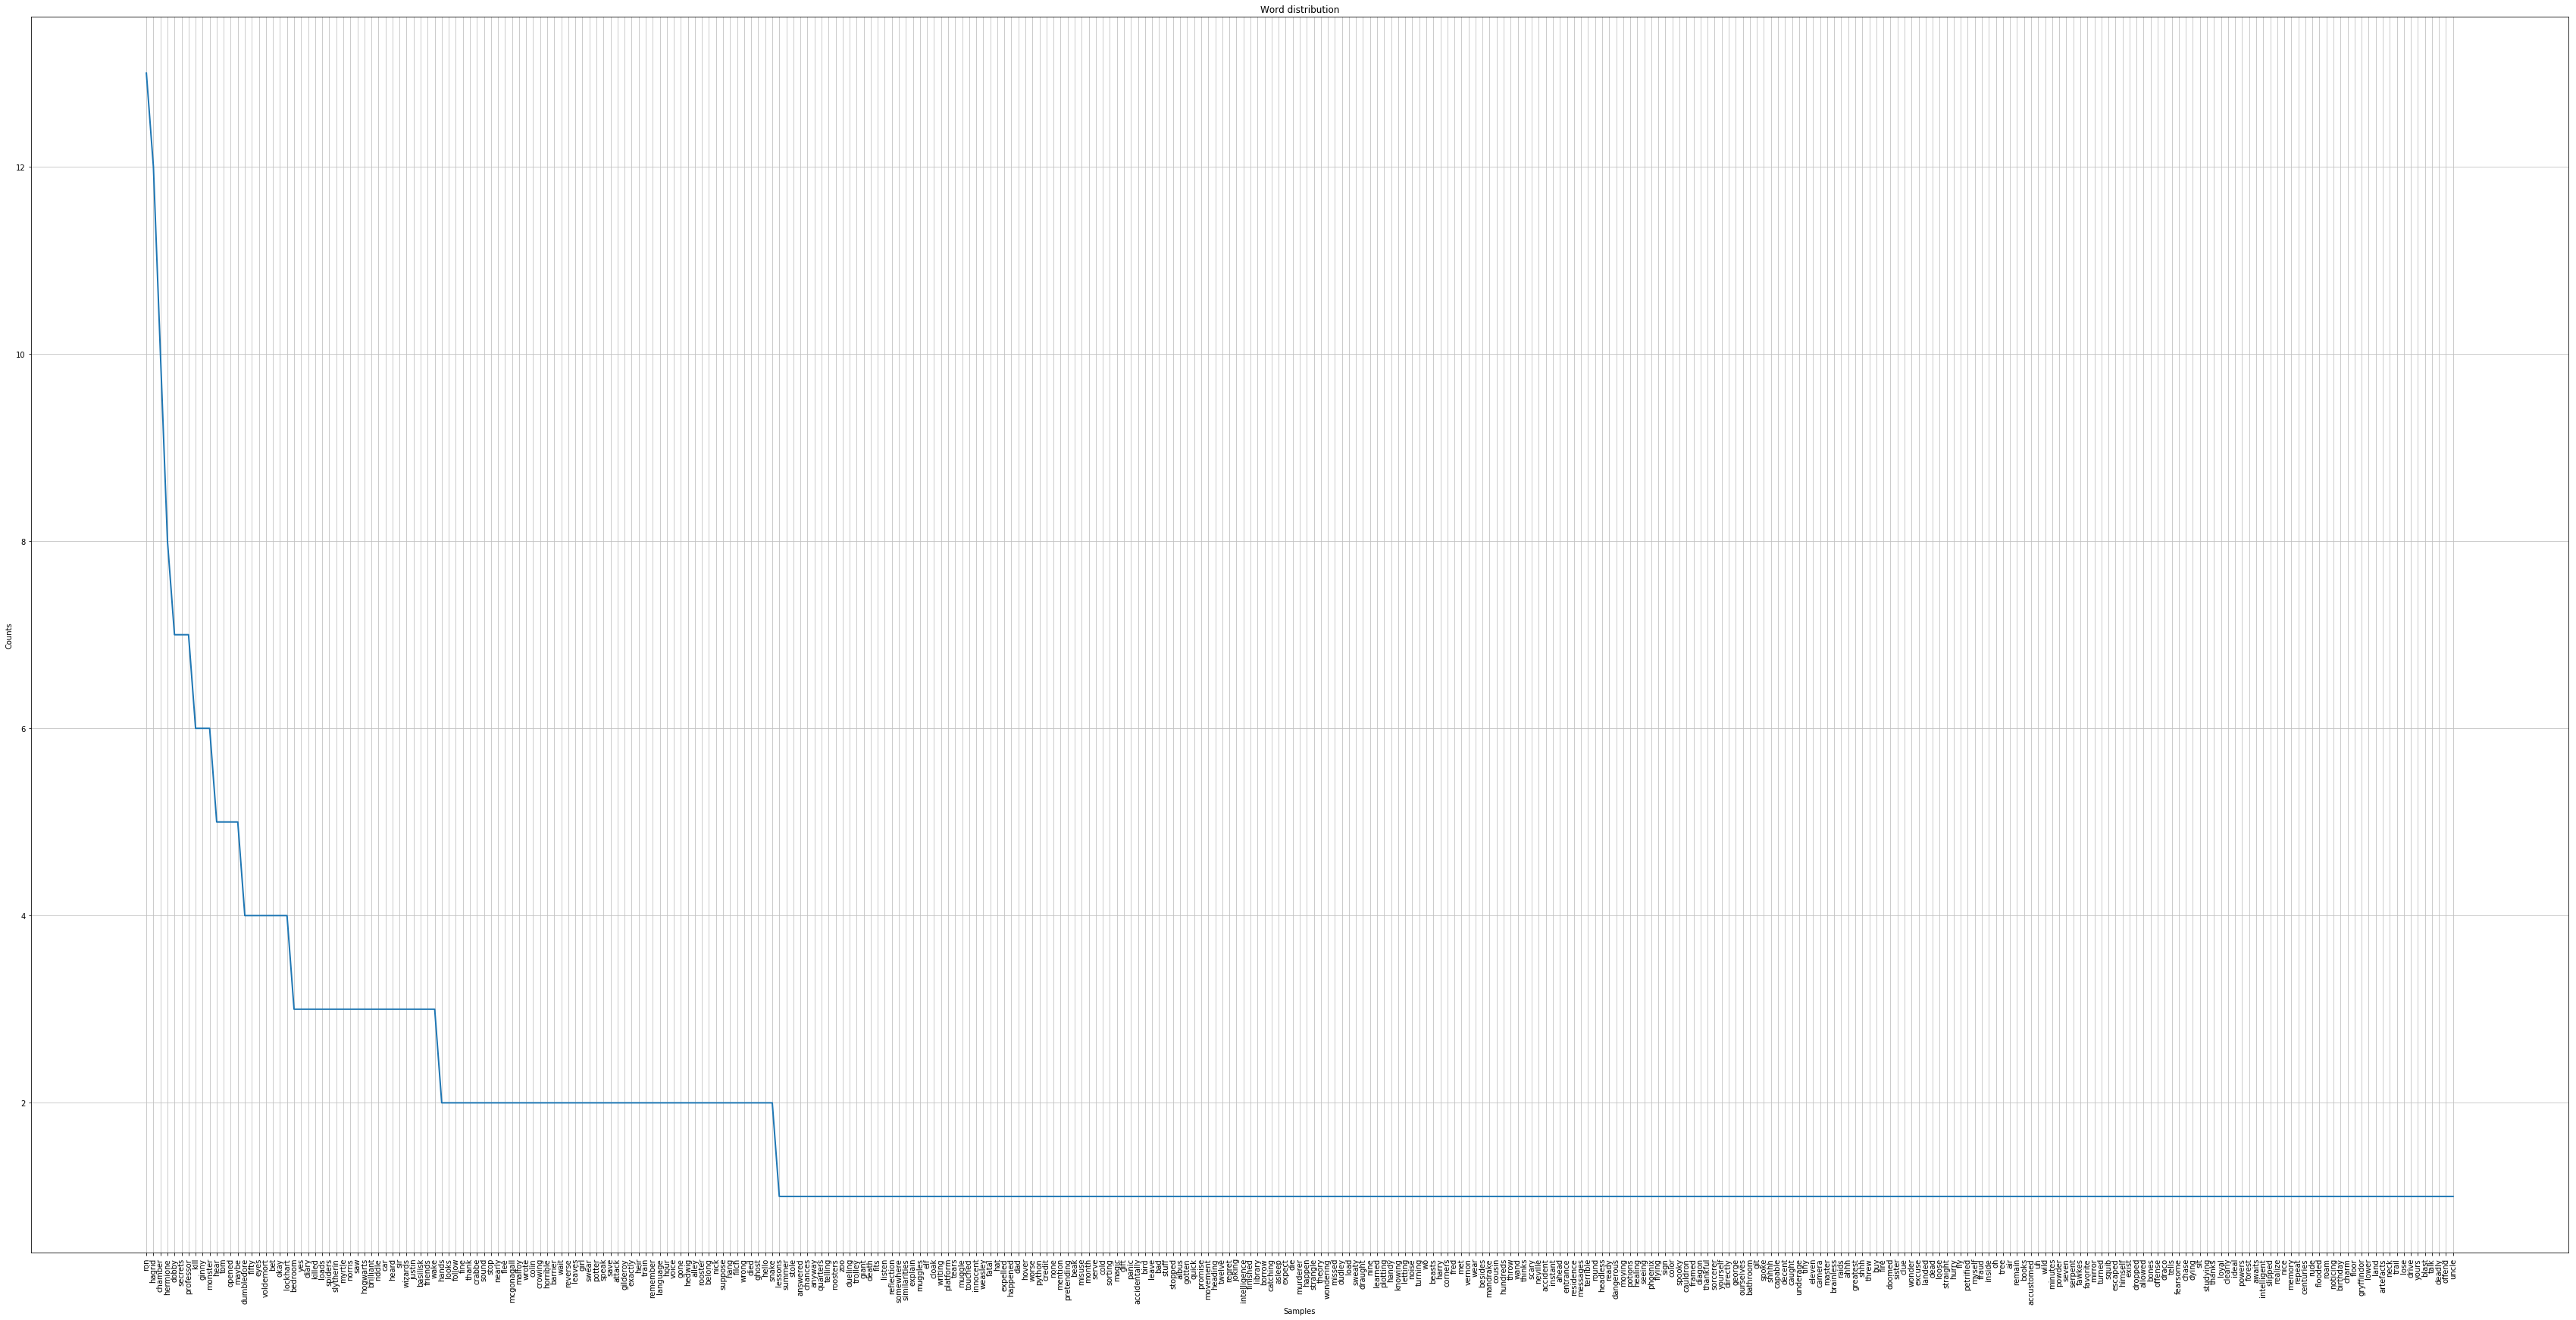

harry number of lines: 359
['Lumos,Maxima...', 'Lumos,Maxima...', 'Lumos,Maxima...', 'Lumos...,MAXIMA!', 'Uncle,Vernon.,,,,I,need,you,to,sign']
<bound method FreqDist.most_common of FreqDist({'sirius': 10, 'professor': 10, 'ron': 9, 'dad': 7, 'hermione': 6, 'kill': 5, 'yes': 5, 'harry': 5, 'dementors': 5, 'pettigrew': 5, ...})>


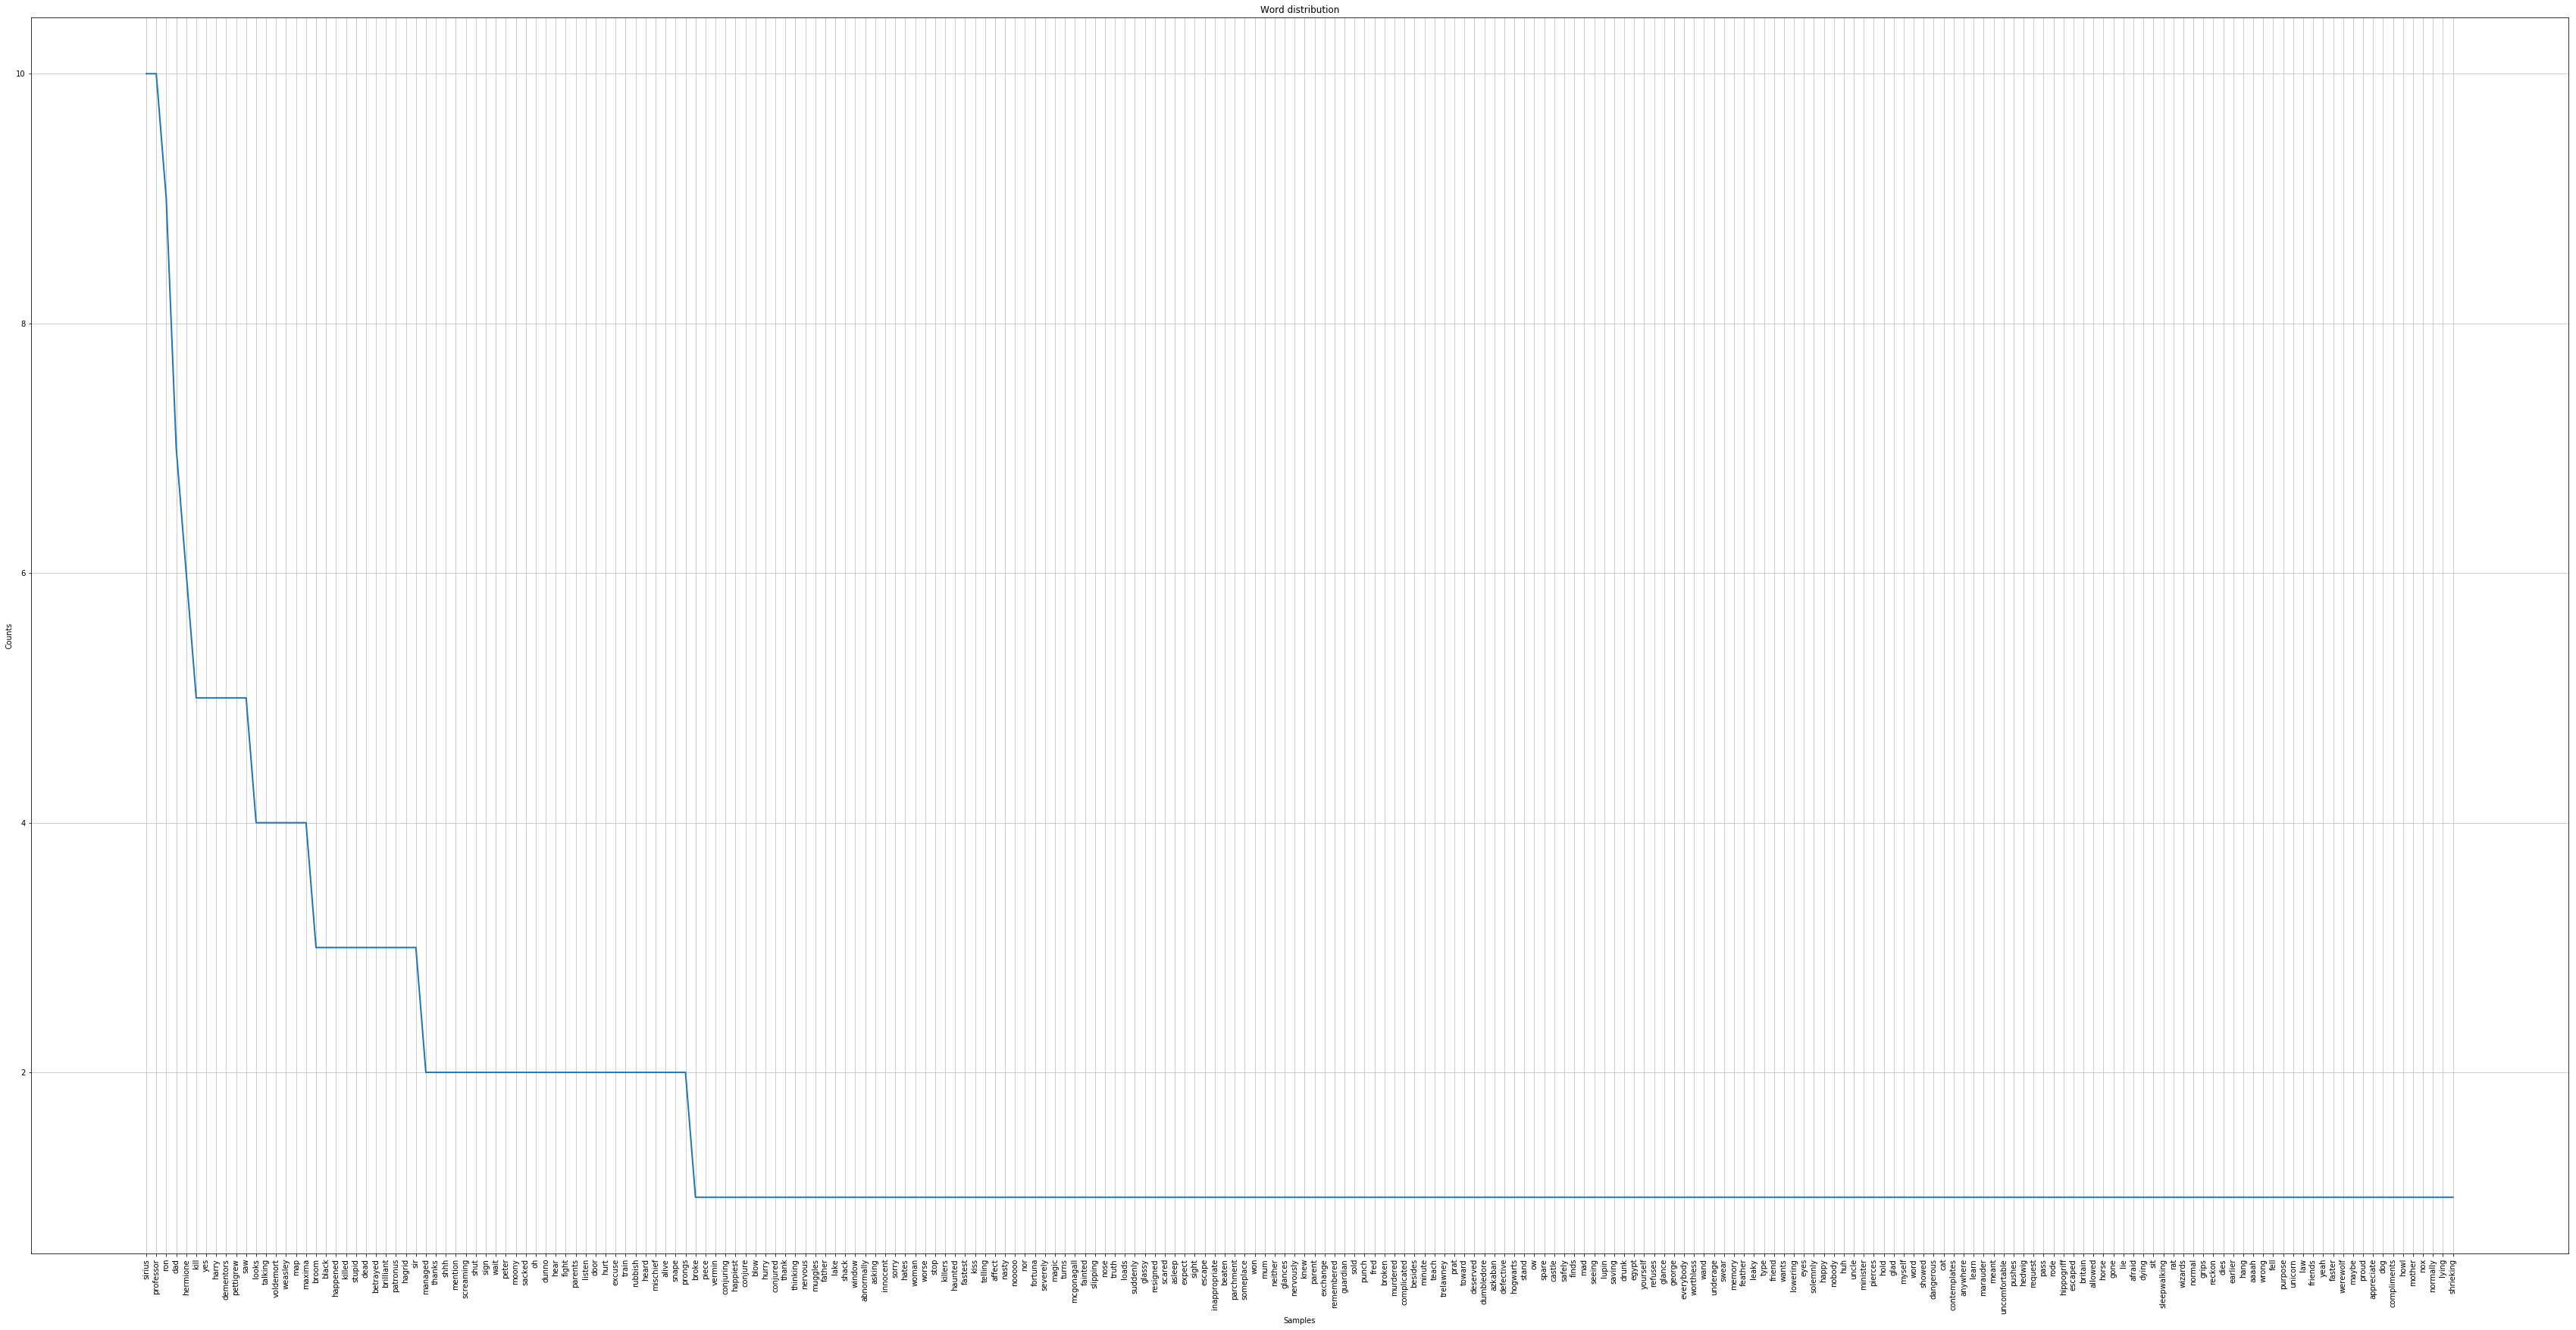

harry number of lines: 222
['Hermione.,Bad,dream.,When,did,you,get', 'here?', 'Last,night.', "Hermione,goes,over,to,Ron's,bed.", 'Where,are,we,actually,going?']
<bound method FreqDist.most_common of FreqDist({'sir': 8, 'cedric': 6, 'yes': 5, 'yeah': 5, 'professor': 5, 'ron': 4, 'hour': 4, 'hermione': 4, 'myrtle': 3, 'wanted': 3, ...})>


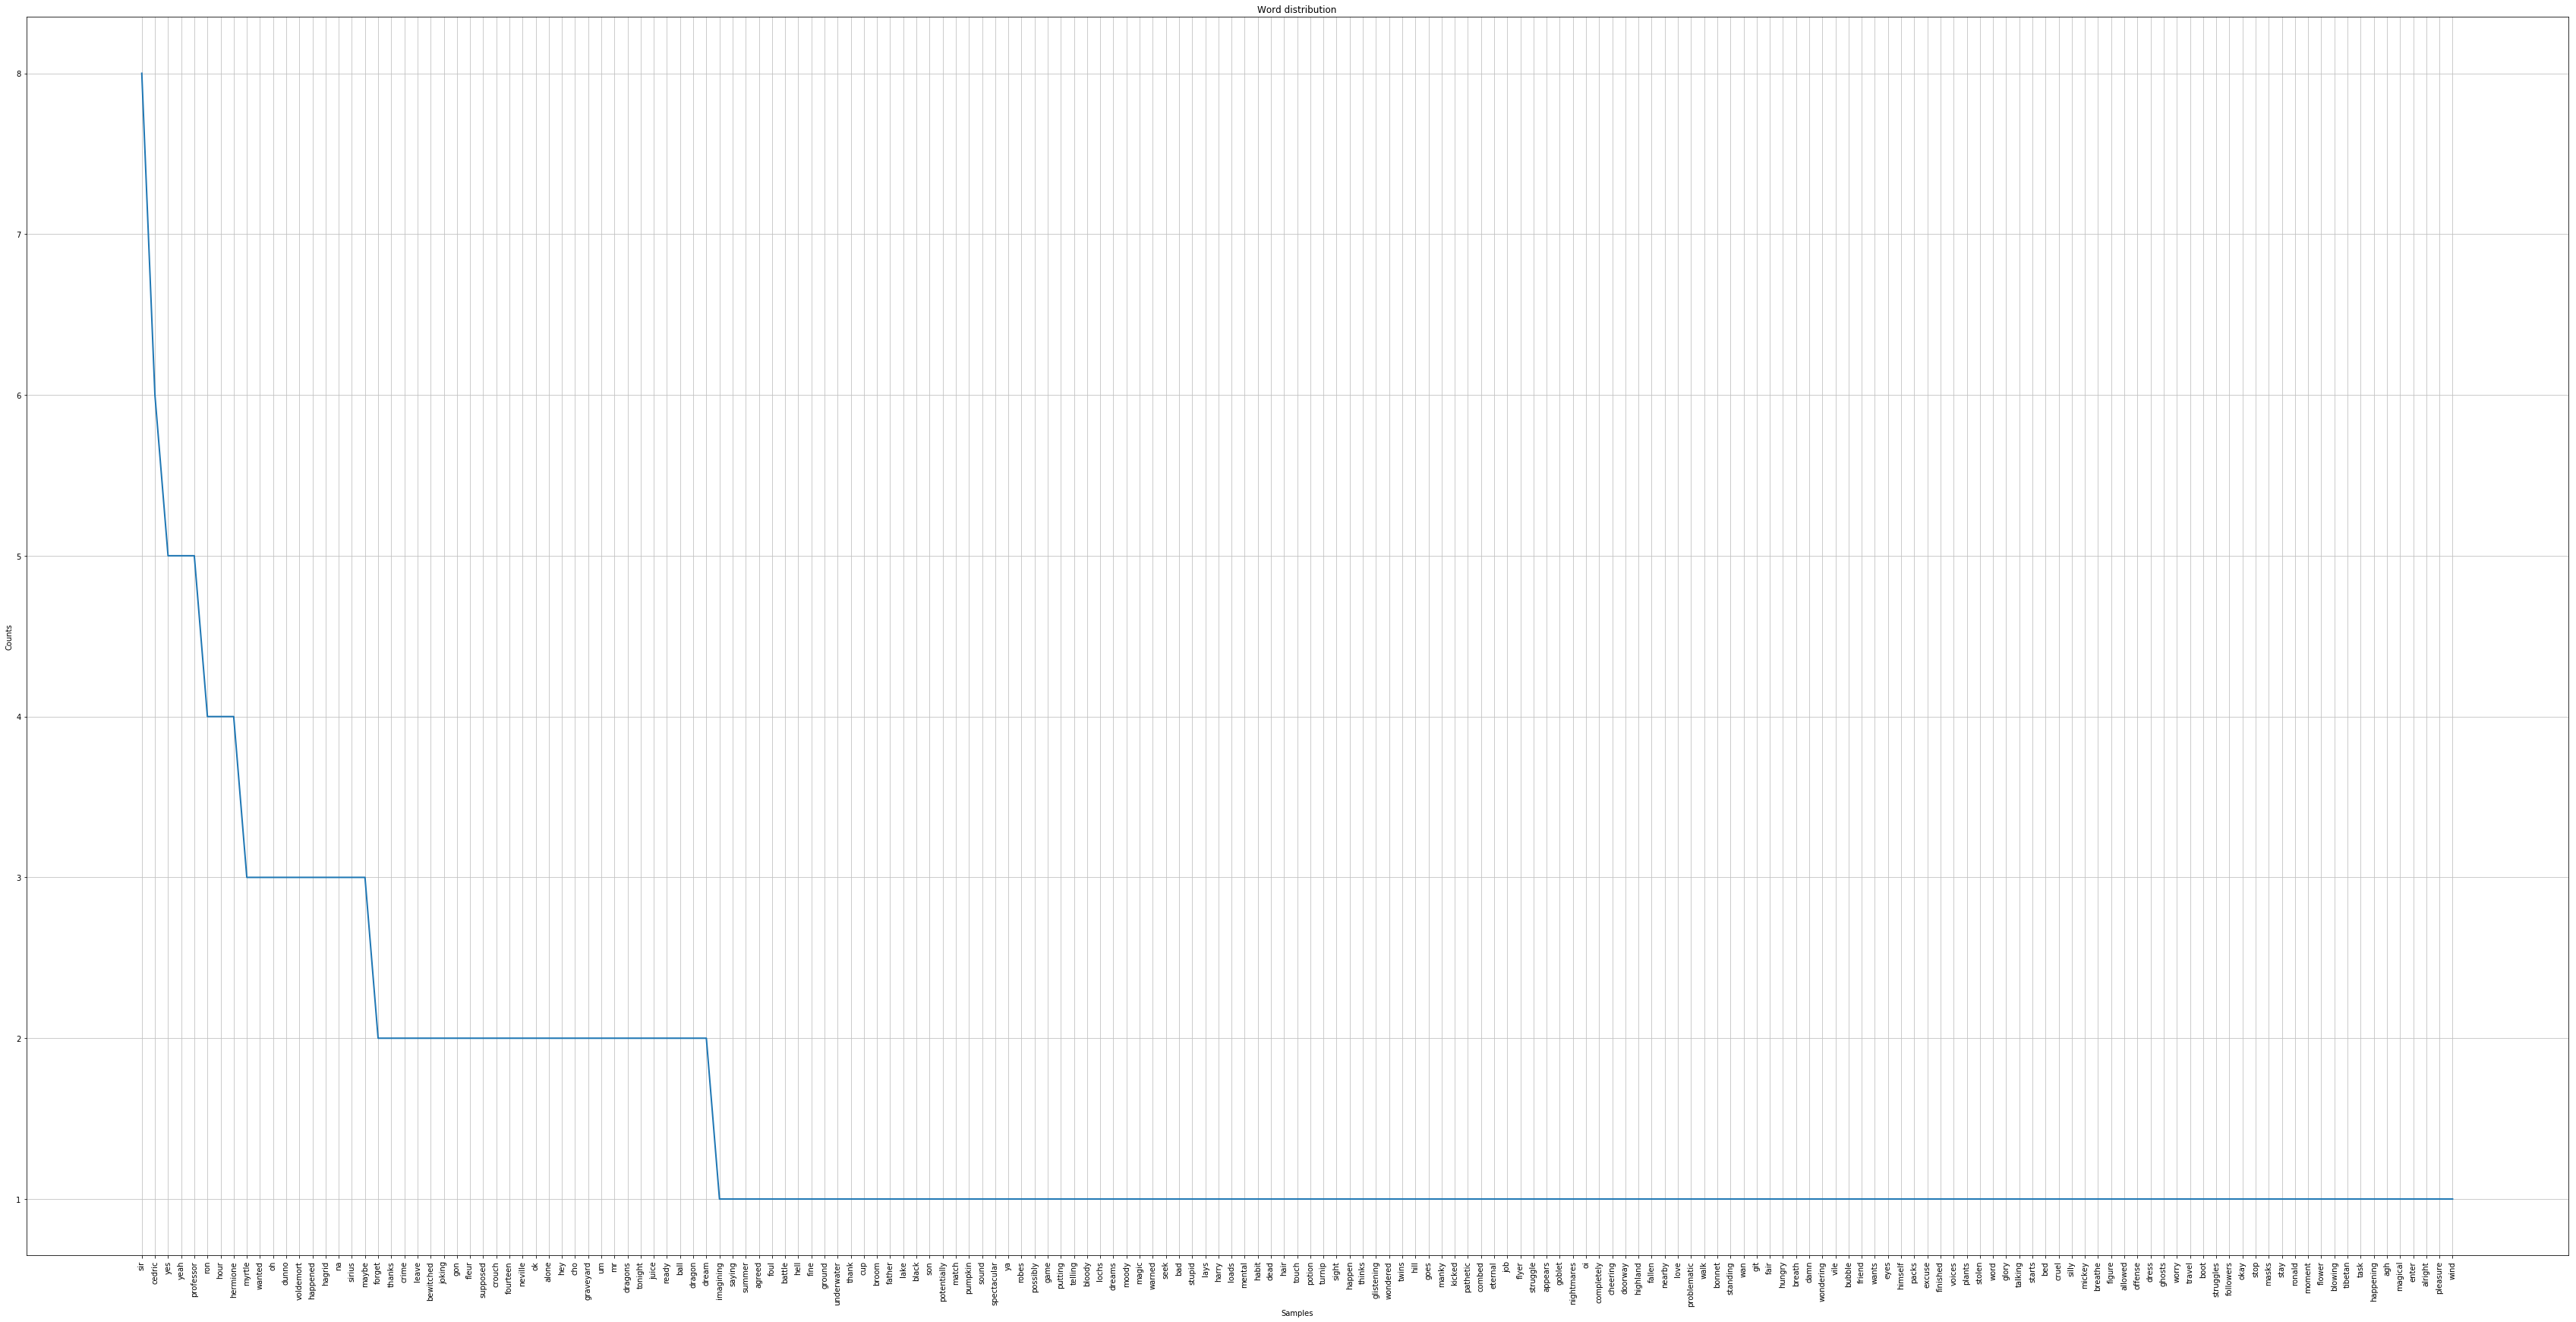

In [104]:
chars = ["harry"] # , "dumbledore", "hagrid"
fdist_list = []
for i, char in enumerate(chars):
    for book in range(1, 4):
        lines = get_lines_from_file(char, str(book))
        print lines[:5]
        fdist_list.append(get_freqdist(lines))
        print fdist_list[book-1].most_common
        plot_freq(fdist_list[book-1])
